In [1]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_simulation
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import pandas as pd
import numpy as np

logging.basicConfig(format='%(message)s', level=logging.INFO)

In [2]:
create_experiment_snapshots([25, 50, 75, 100])

In [3]:
features = ["host_compromise_ratio", "exposed_endpoints", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]


In [4]:
evaluation = execute_ai_simulation(start_time=0, finish_time=None, scheme='random', mtd_interval=None, custom_strategies=None,
                        checkpoints=None, total_nodes=50, total_endpoints=5, total_subnets=8, total_layers=4,
                        target_layer=4, total_database=2, terminate_compromise_ratio=0.8, new_network=False, features=features)
# evaluation.get_network().draw()
# evaluation.visualise_mtd_operation()
# evaluation.visualise_attack_operation_group_by_host()
# evaluation.visualise_attack_operation()
# evaluation.compromise_record_by_attack_action()
# evaluation.evaluation_result_by_compromise_checkpoint()

2024-07-22 10:27:30.183895: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-07-22 10:27:30.183917: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-07-22 10:27:30.183921: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-07-22 10:27:30.183952: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-22 10:27:30.183970: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Action: 0
Action: 0
Action: 0
Action: 1
MTD: OSDiversity triggered 0.0s
Action: 1
MTD: CompleteTopologyShuffle triggered 200.2s
MTD: Interrupted EXPLOIT_VULN at 322.5s!
Action: 0
Act

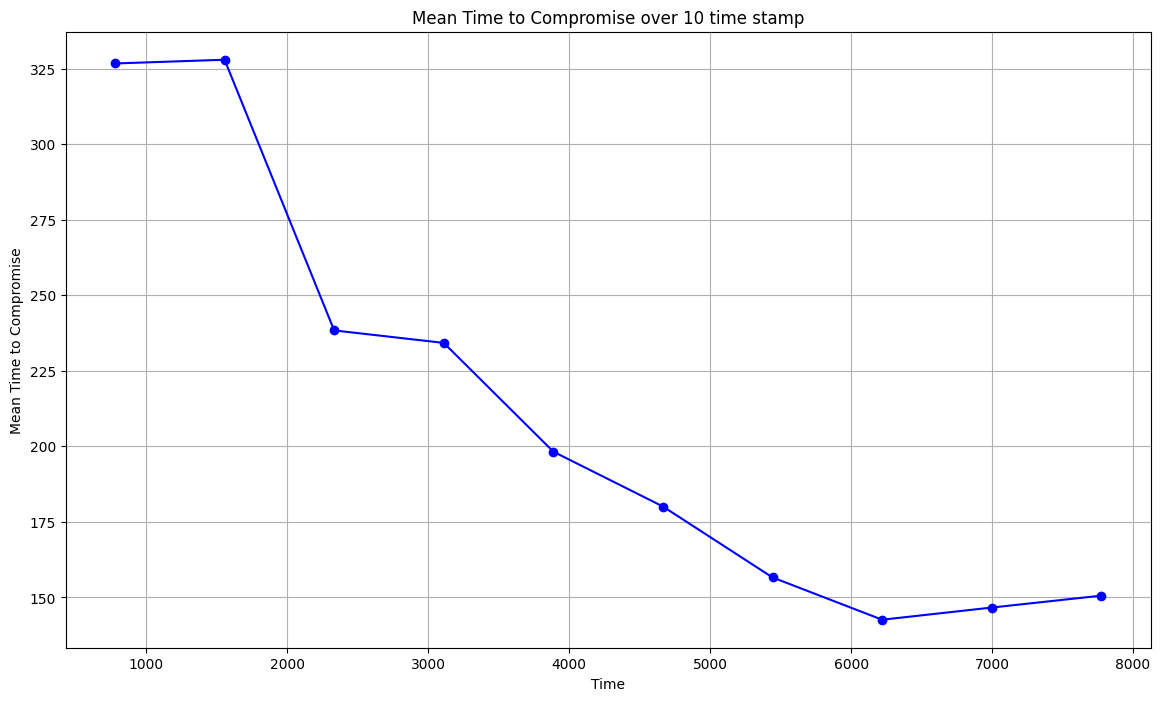

In [5]:
eva = evaluation.visualise_against_mttc()

Action: 1
MTD: CompleteTopologyShuffle triggered 0.0s
MTD: Interrupted SCAN_PORT at 120.7s!
Action: 1
MTD: IPShuffle triggered 202.1s
MTD: Interrupted EXPLOIT_VULN at 312.7s!
Action: 0
Action: 0
Action: 0
Action: 1
MTD: OSDiversity triggered 402.6s
Action: 1
MTD: IPShuffle triggered 603.1s
MTD: Interrupted EXPLOIT_VULN at 713.3s!
Action: 0
Action: 0
Action: 0
Action: 0
Action: 0
Action: 0
Action: 0
Action: 0
Action: 0
Action: 0
Action: 1
MTD: ServiceDiversity triggered 803.3s
Action: 1
MTD: IPShuffle triggered 1003.4s
MTD: Interrupted EXPLOIT_VULN at 1114.0s!
Action: 0
Action: 0
Action: 0
Action: 0
Action: 1
MTD: ServiceDiversity triggered 1203.9s
Action: 1
MTD: CompleteTopologyShuffle triggered 1404.3s
MTD: Interrupted EXPLOIT_VULN at 1526.5s!
Action: 0
Action: 0
Action: 1
MTD: ServiceDiversity triggered 1605.2s
Action: 1
MTD: ServiceDiversity triggered 1805.8s
Action: 1
MTD: OSDiversity triggered 2005.9s
Action: 1
MTD: IPShuffle triggered 2206.4s
MTD: Interrupted EXPLOIT_VULN at 2319

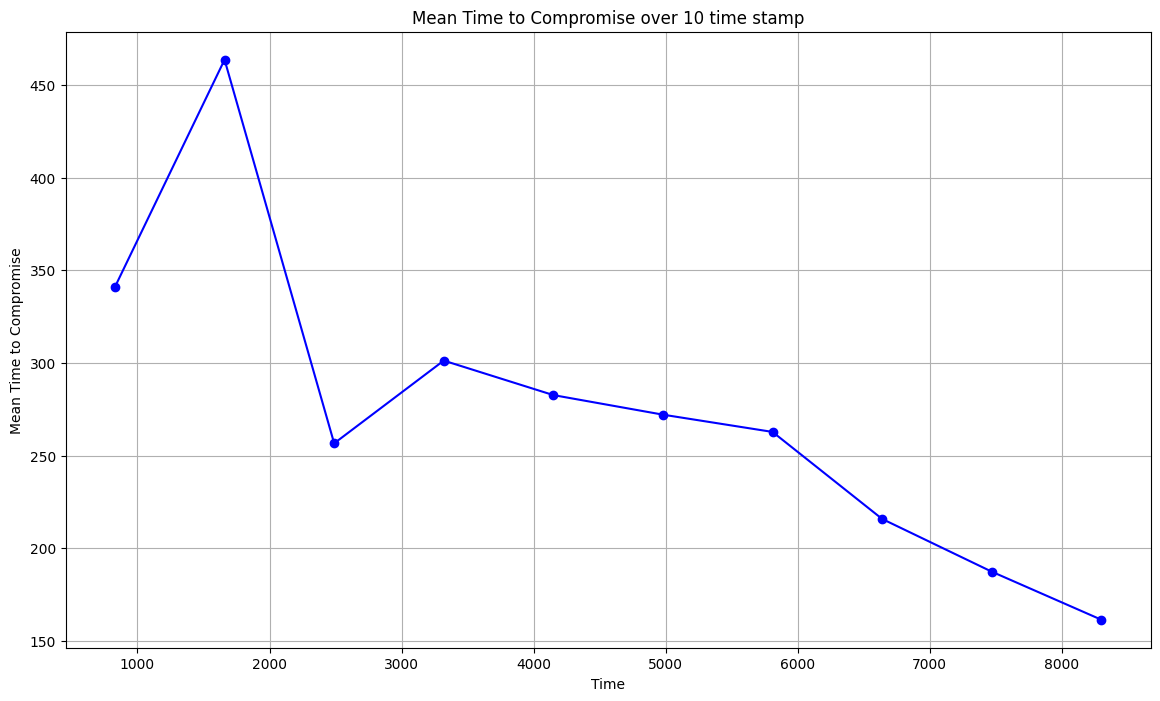

Action: 0
Action: 0
Action: 1
MTD: CompleteTopologyShuffle triggered 0.0s
MTD: Interrupted SCAN_PORT at 120.6s!
Action: 0
Action: 1
MTD: CompleteTopologyShuffle triggered 200.6s
MTD: Interrupted EXPLOIT_VULN at 321.2s!
Action: 1
MTD: OSDiversity triggered 401.5s
Action: 1
MTD: ServiceDiversity triggered 601.5s
Action: 1
MTD: OSDiversity triggered 801.8s
Action: 1
MTD: IPShuffle triggered 1003.1s
MTD: Interrupted EXPLOIT_VULN at 1113.3s!
Action: 1
MTD: OSDiversity triggered 1203.8s
Action: 1
MTD: OSDiversity triggered 1404.3s
Action: 1
MTD: IPShuffle triggered 1604.5s
MTD: Interrupted EXPLOIT_VULN at 1714.5s!
Action: 1
MTD: CompleteTopologyShuffle triggered 1805.5s
MTD: Interrupted EXPLOIT_VULN at 1926.1s!
Action: 1
MTD: CompleteTopologyShuffle triggered 2005.6s
MTD: Interrupted SCAN_PORT at 2126.7s!
Action: 0
Action: 1
MTD: IPShuffle triggered 2206.3s
MTD: Interrupted EXPLOIT_VULN at 2317.1s!
Action: 1
MTD: ServiceDiversity triggered 2406.8s
Action: 1
MTD: OSDiversity triggered 2607.9s

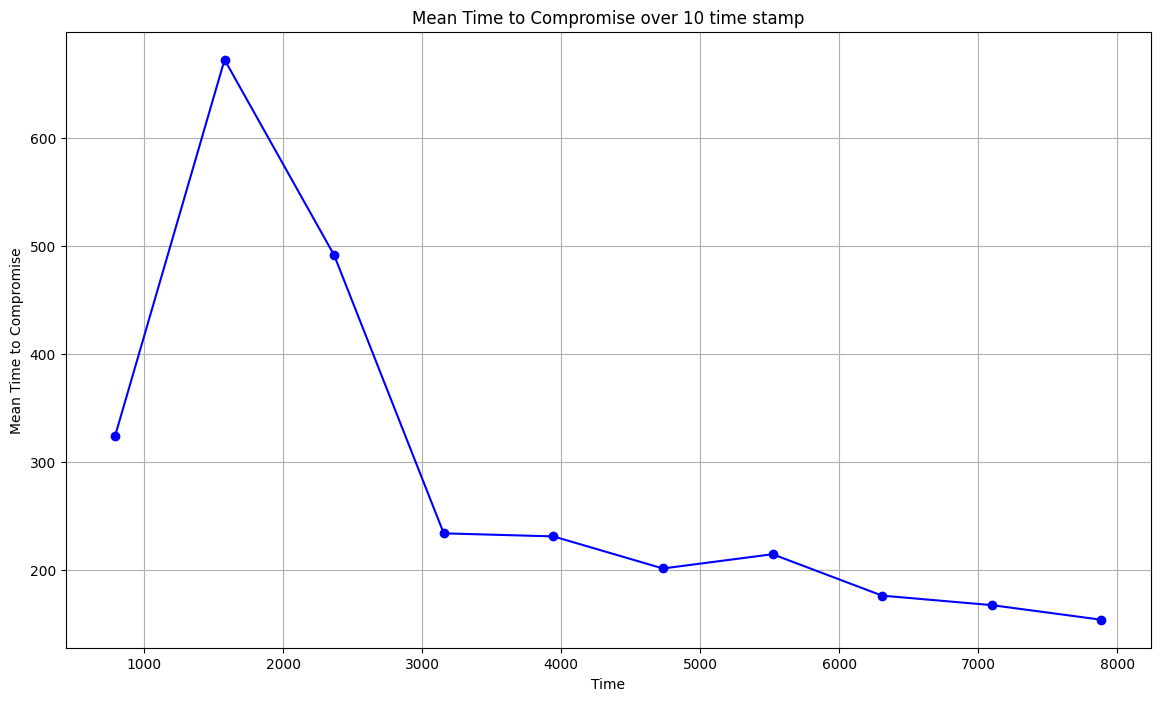

Action: 1
MTD: CompleteTopologyShuffle triggered 0.0s
MTD: Interrupted SCAN_PORT at 121.1s!
Action: 0
Action: 1
MTD: CompleteTopologyShuffle triggered 200.2s
MTD: Interrupted EXPLOIT_VULN at 320.5s!
Action: 0
Action: 0
Action: 0
Action: 1
MTD: ServiceDiversity triggered 400.5s
Action: 1
MTD: CompleteTopologyShuffle triggered 600.5s
MTD: Interrupted EXPLOIT_VULN at 721.3s!
Action: 1
MTD: CompleteTopologyShuffle triggered 800.7s
MTD: Interrupted EXPLOIT_VULN at 921.9s!
Action: 0
Action: 0
Action: 0
Action: 0
Action: 1
MTD: CompleteTopologyShuffle triggered 1000.9s
MTD: Interrupted ENUM_HOST at 1120.9s!
Action: 0
Action: 1
MTD: CompleteTopologyShuffle triggered 1201.4s
MTD: Interrupted ENUM_HOST at 1321.5s!
Action: 1
MTD: ServiceDiversity triggered 1401.6s
Action: 1
MTD: CompleteTopologyShuffle triggered 1601.8s
MTD: Interrupted EXPLOIT_VULN at 1722.2s!
Action: 1
MTD: IPShuffle triggered 1801.9s
MTD: Interrupted EXPLOIT_VULN at 1912.3s!
Action: 0
Action: 0
Action: 1
MTD: IPShuffle trigger

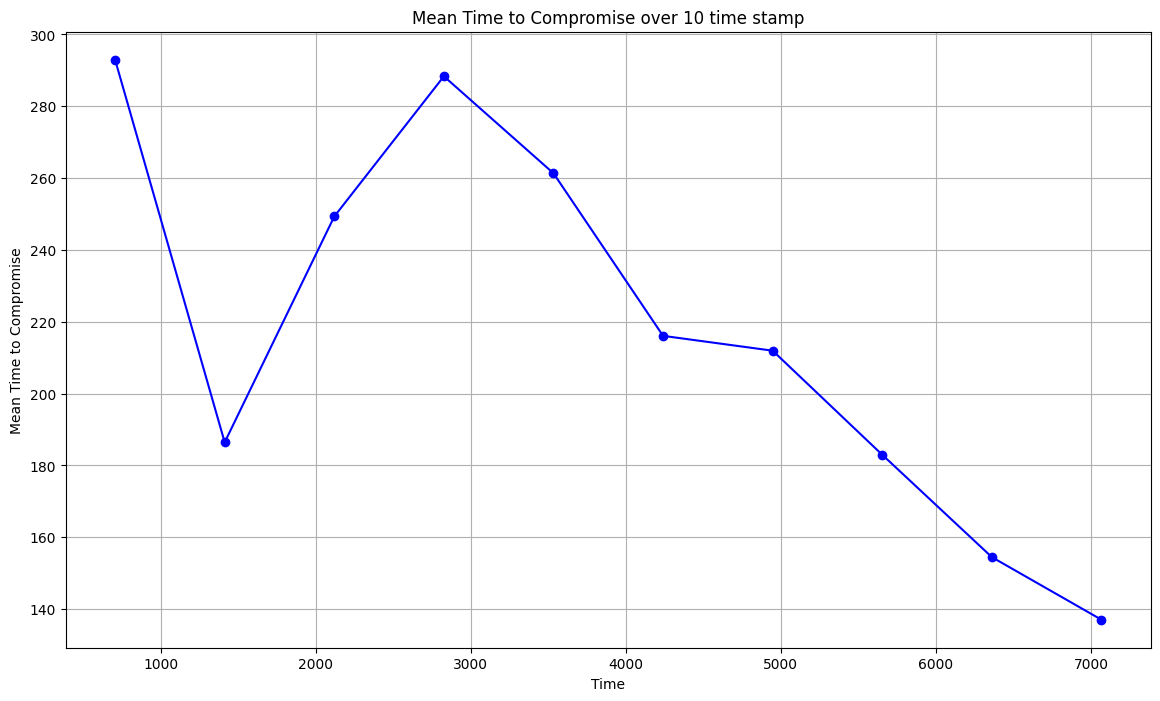

Action: 0
Action: 0
Action: 0
Action: 0
Action: 0
Action: 0
Action: 1
MTD: OSDiversity triggered 0.0s
Action: 1
MTD: CompleteTopologyShuffle triggered 200.2s
MTD: Interrupted EXPLOIT_VULN at 320.9s!
Action: 0
Action: 0
Action: 0
Action: 1
MTD: CompleteTopologyShuffle triggered 400.3s
MTD: Interrupted EXPLOIT_VULN at 522.0s!
Action: 0
Action: 1
MTD: ServiceDiversity triggered 602.4s
Action: 1
MTD: CompleteTopologyShuffle triggered 802.6s
MTD: Interrupted SCAN_PORT at 922.8s!
Action: 1
MTD: OSDiversity triggered 1002.7s
Action: 1
MTD: ServiceDiversity triggered 1203.0s
Action: 1
MTD: ServiceDiversity triggered 1404.4s
Action: 1
MTD: CompleteTopologyShuffle triggered 1605.2s
MTD: Interrupted EXPLOIT_VULN at 1725.5s!
Action: 0
Action: 0
Action: 1
MTD: OSDiversity triggered 1805.6s
Action: 1
MTD: CompleteTopologyShuffle triggered 2006.2s
MTD: Interrupted EXPLOIT_VULN at 2128.0s!
Action: 0
Action: 1
MTD: IPShuffle triggered 2206.8s
MTD: Interrupted EXPLOIT_VULN at 2317.7s!
Action: 0
Action: 

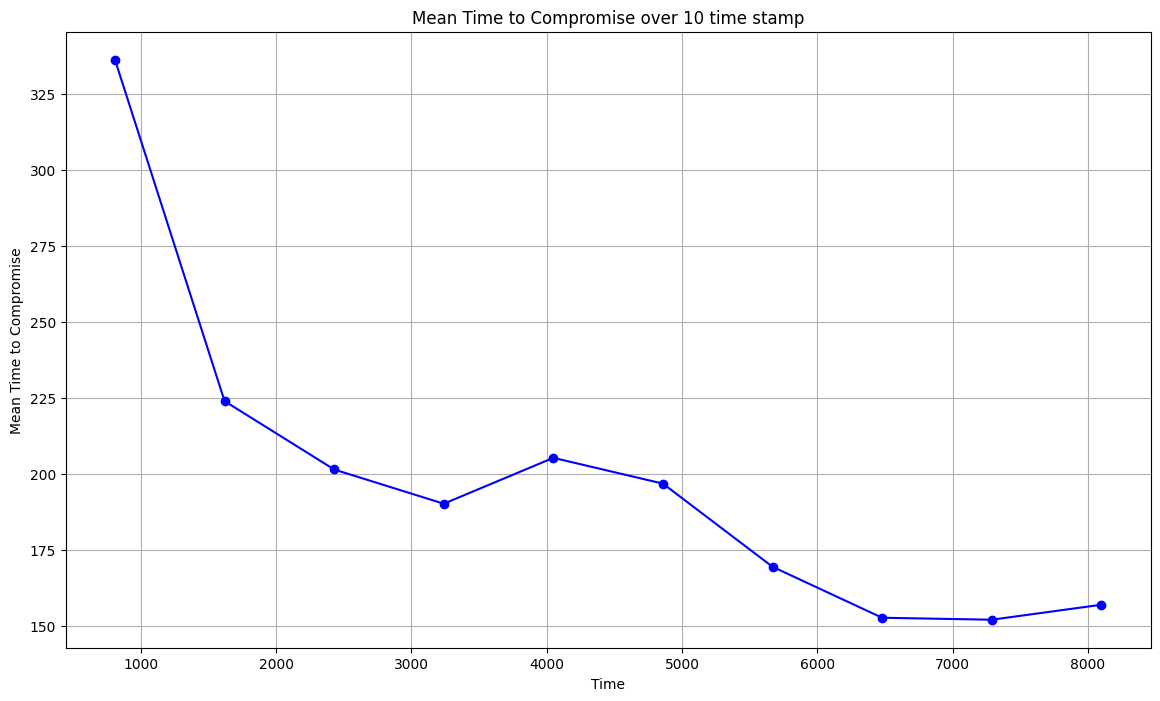

Action: 0
Action: 0
Action: 1
MTD: CompleteTopologyShuffle triggered 0.0s
MTD: Interrupted SCAN_PORT at 121.4s!
Action: 0
Action: 1
MTD: OSDiversity triggered 200.2s
Action: 1
MTD: OSDiversity triggered 400.5s
Action: 1
MTD: IPShuffle triggered 600.8s
MTD: Interrupted EXPLOIT_VULN at 711.2s!
Action: 1
MTD: ServiceDiversity triggered 801.4s
Action: 1
MTD: IPShuffle triggered 1001.8s
MTD: Interrupted EXPLOIT_VULN at 1112.7s!
Action: 0
Action: 1
MTD: ServiceDiversity triggered 1201.8s
Action: 1
MTD: CompleteTopologyShuffle triggered 1401.8s
MTD: Interrupted EXPLOIT_VULN at 1521.9s!
Action: 1
MTD: ServiceDiversity triggered 1602.2s
Action: 1
MTD: IPShuffle triggered 1803.6s
MTD: Interrupted EXPLOIT_VULN at 1913.9s!
Action: 0
Action: 0
Action: 1
MTD: CompleteTopologyShuffle triggered 2003.7s
MTD: Interrupted EXPLOIT_VULN at 2124.4s!
Action: 1
MTD: CompleteTopologyShuffle triggered 2204.0s
MTD: Interrupted SCAN_PORT at 2324.6s!
Action: 0
Action: 0
Action: 1
MTD: OSDiversity triggered 2404.5s

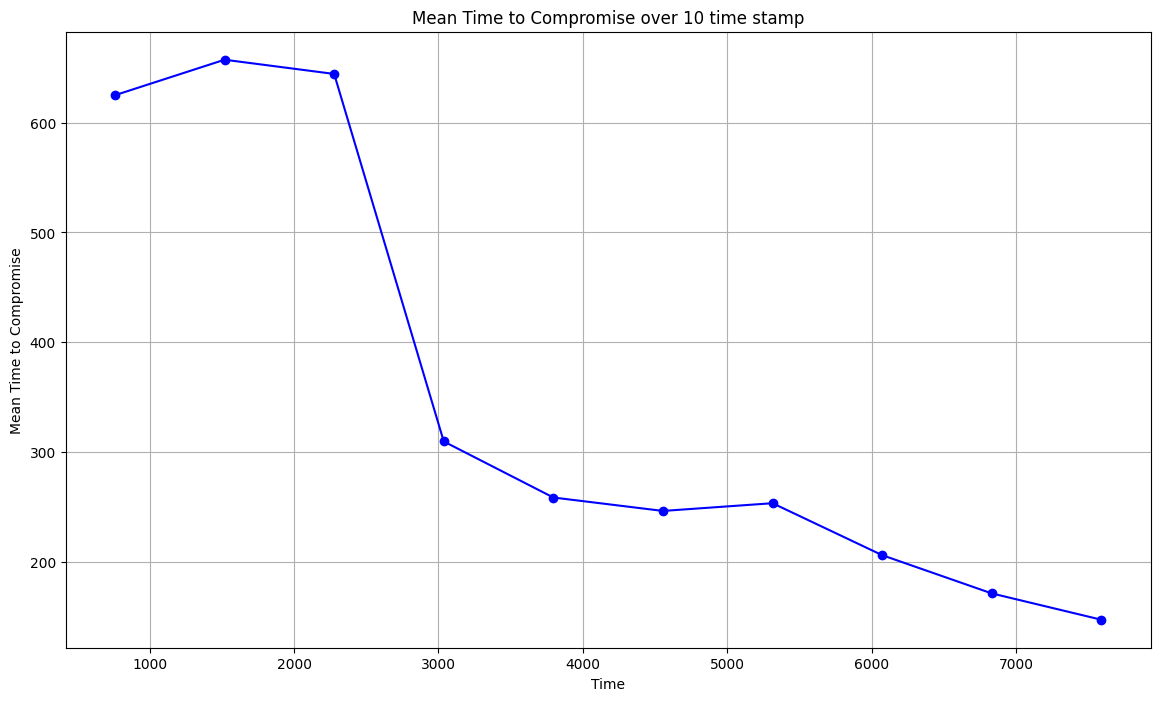

Action: 0
Action: 0
Action: 0
Action: 0
Action: 1
MTD: OSDiversity triggered 0.0s
Action: 1
MTD: OSDiversity triggered 200.1s
Action: 1
MTD: CompleteTopologyShuffle triggered 400.3s
MTD: Interrupted EXPLOIT_VULN at 520.3s!
Action: 1
MTD: CompleteTopologyShuffle triggered 601.4s
MTD: Interrupted EXPLOIT_VULN at 722.3s!
Action: 1
MTD: IPShuffle triggered 801.5s
MTD: Interrupted EXPLOIT_VULN at 912.5s!
Action: 1
MTD: IPShuffle triggered 1001.7s
MTD: Interrupted EXPLOIT_VULN at 1111.9s!
Action: 1
MTD: CompleteTopologyShuffle triggered 1201.9s
MTD: Interrupted SCAN_PORT at 1321.9s!
Action: 1
MTD: ServiceDiversity triggered 1402.8s
Action: 1
MTD: ServiceDiversity triggered 1603.2s
Action: 1
MTD: CompleteTopologyShuffle triggered 1804.1s
MTD: Interrupted EXPLOIT_VULN at 1925.6s!
Action: 1
MTD: OSDiversity triggered 2005.7s
Action: 1
MTD: OSDiversity triggered 2206.0s
Action: 1
MTD: CompleteTopologyShuffle triggered 2406.7s
MTD: Interrupted SCAN_PORT at 2528.2s!
Action: 1
MTD: OSDiversity trig

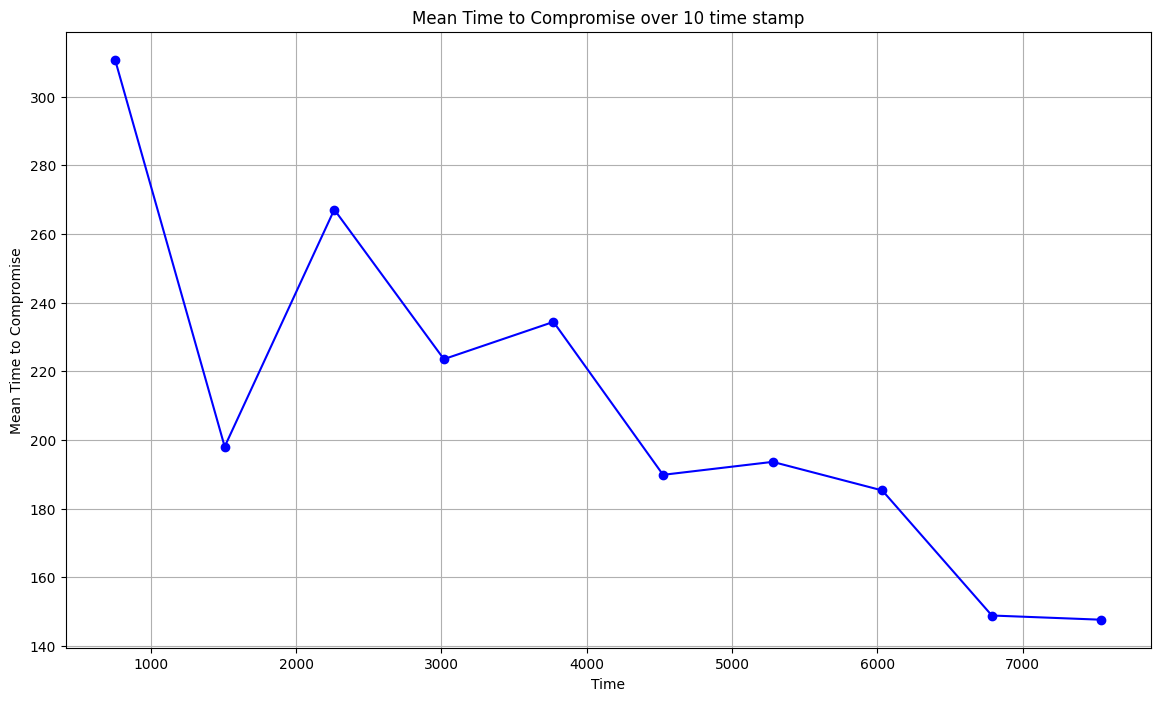

Action: 0
Action: 1
MTD: IPShuffle triggered 0.0s
MTD: Interrupted BRUTE_FORCE at 110.3s!
Action: 1
MTD: CompleteTopologyShuffle triggered 200.0s
MTD: Interrupted EXPLOIT_VULN at 320.1s!
Action: 1
MTD: ServiceDiversity triggered 400.1s
Action: 1
MTD: CompleteTopologyShuffle triggered 600.4s
MTD: Interrupted EXPLOIT_VULN at 720.4s!
Action: 0
Action: 0
Action: 1
MTD: IPShuffle triggered 800.4s
MTD: Interrupted SCAN_PORT at 910.5s!
Action: 0
Action: 0
Action: 0
Action: 1
MTD: OSDiversity triggered 1000.9s
Action: 1
MTD: ServiceDiversity triggered 1201.4s
Action: 1
MTD: CompleteTopologyShuffle triggered 1402.2s
MTD: Interrupted EXPLOIT_VULN at 1522.2s!
Action: 0
Action: 1
MTD: CompleteTopologyShuffle triggered 1602.5s
MTD: Interrupted EXPLOIT_VULN at 1723.0s!
Action: 1
MTD: ServiceDiversity triggered 1802.6s
Action: 1
MTD: OSDiversity triggered 2003.0s
Action: 1
MTD: CompleteTopologyShuffle triggered 2203.3s
MTD: Interrupted SCAN_PORT at 2323.8s!
Action: 0
Action: 0
Action: 1
MTD: IPShuffl

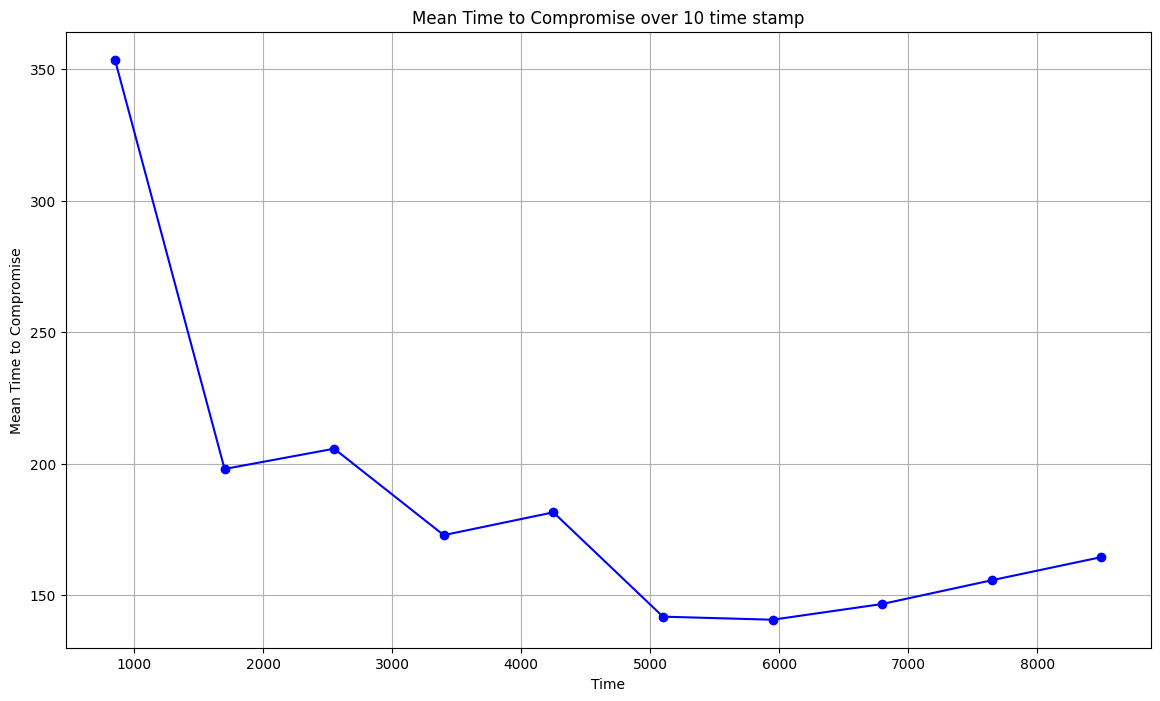

In [6]:
# evaluation = execute_simulation(start_time=0, finish_time=3000, mtd_interval=200, scheme='random', total_nodes=100)
for i in range(len(features)):
    evaluation = execute_ai_simulation(start_time=0, finish_time=None, scheme='random', mtd_interval=None, custom_strategies=None,
                        checkpoints=None, total_nodes=50, total_endpoints=5, total_subnets=8, total_layers=4,
                        target_layer=4, total_database=2, terminate_compromise_ratio=0.8, new_network=False, features=[features[i]])
    evaluation.visualise_against_mttc()